## EDA and Data Pre-processing

import libraries -> import data -> read data -> find no of attributes -> deal with null values -> find unique value -> fix undesired characters -> check for label imbalance -> fix the data type -> find and remove the outliers (not needed here) -> encode the data -> find and plot co-relations -> separate data and label -> fix label imbalance (if needed) -> scaling -> applying PCA -> train_test split

In [2]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('/content/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [5]:
df.sample(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
149,149,65.0,70.0,1.020,1.0,0.0,abnormal,abnormal,notpresent,notpresent,...,32,NaN,NaN,yes,no,no,good,yes,no,ckd
298,298,34.0,60.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,48,8600,4.9,no,no,no,good,no,no,notckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
100,100,34.0,70.0,1.015,4.0,0.0,abnormal,abnormal,notpresent,notpresent,...,NaN,NaN,NaN,no,no,no,good,yes,no,ckd
90,90,63.0,100.0,1.010,2.0,2.0,normal,normal,notpresent,present,...,40,9800,4.2,yes,no,yes,good,no,no,ckd


In [6]:
# finding null values
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [7]:
# imputing null values
imputer = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")
df_imputed = pd.DataFrame(imputer.fit_transform(df))
df_imputed.columns = df.columns

In [8]:
df_imputed.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [9]:
# find unique values
for i in df_imputed.columns:
  print(i)
  print()
  print(df_imputed[i].unique())
  print()
  print()
  print()

id

[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 

Not desired Characters:

*   pcv : \t?  \t43
*   wc :  '\t6200' '\t8400'  '\t?'
*   rc : \t?
*   dm : '\tno' '\tyes'
*  cad: \tno
*  classification : 'ckd\t'





In [10]:
print(df_imputed["pcv"].mode())
print(df_imputed["wc"].mode())
print(df_imputed["rc"].mode())

0    41
dtype: object
0    9800
dtype: object
0    5.2
dtype: object


In [11]:
# df['Maths'].apply(lambda x: 'Pass' if x>=5 else 'Fail')
df_imputed['pcv'] = df_imputed['pcv'].apply(lambda x: '41' if x == '\t?' else x)
df_imputed['pcv'] = df_imputed['pcv'].apply(lambda x: '43' if x == '\t43' else x)

df_imputed['wc'] = df_imputed['wc'].apply(lambda x: '6200' if x == '\t6200' else x)
df_imputed['wc'] = df_imputed['wc'].apply(lambda x: '8400' if x == '\t8400' else x)
df_imputed['wc'] = df_imputed['wc'].apply(lambda x: '9800' if x == '\t?' else x)

df_imputed['rc'] = df_imputed['rc'].apply(lambda x: '5.2' if x == '\t?' else x)

df_imputed['dm'] = df_imputed['dm'].apply(lambda x: 'no' if x == '\tno' else x)
df_imputed['dm'] = df_imputed['rc'].apply(lambda x: 'yes' if x == '\tyes' else x)

df_imputed['cad'] = df_imputed['cad'].apply(lambda x: 'no' if x == '\tno' else x)

df_imputed['classification'] = df_imputed['classification'].apply(lambda x: 'ckd' if x == 'ckd\t' else x)

In [12]:
# find unique values
for i in df_imputed.columns:
  print(i)
  print()
  print(df_imputed[i].unique())
  print()
  print()
  print()

id

[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [14]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              400 non-null    object
 1   age             400 non-null    object
 2   bp              400 non-null    object
 3   sg              400 non-null    object
 4   al              400 non-null    object
 5   su              400 non-null    object
 6   rbc             400 non-null    object
 7   pc              400 non-null    object
 8   pcc             400 non-null    object
 9   ba              400 non-null    object
 10  bgr             400 non-null    object
 11  bu              400 non-null    object
 12  sc              400 non-null    object
 13  sod             400 non-null    object
 14  pot             400 non-null    object
 15  hemo            400 non-null    object
 16  pcv             400 non-null    object
 17  wc              400 non-null    object
 18  rc        

In [15]:
# fix data type
for i in df.select_dtypes(exclude = ['object']).columns:
  df_imputed[i] = df_imputed[i].astype("float")

In [16]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    float64
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    object 
 17  wc              400 non-null    obj

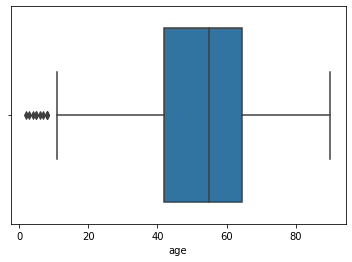

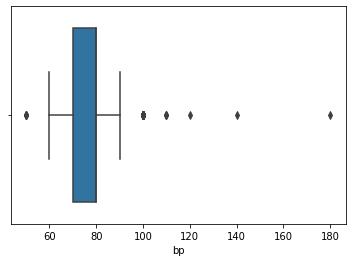

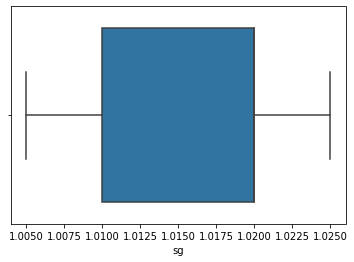

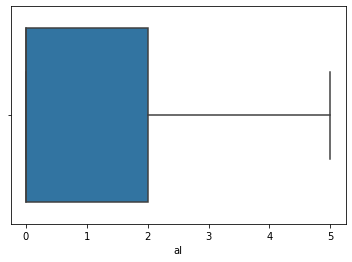

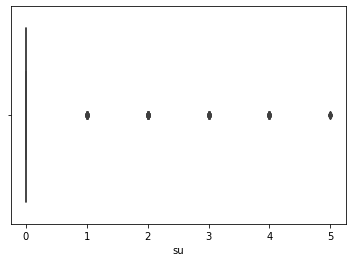

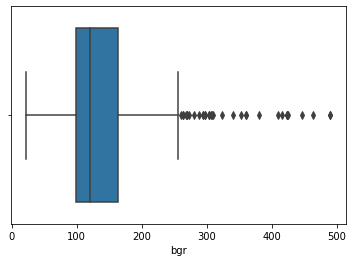

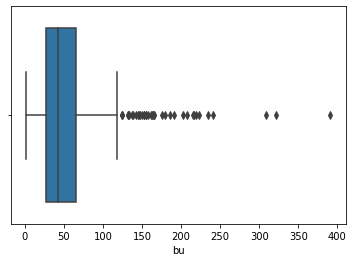

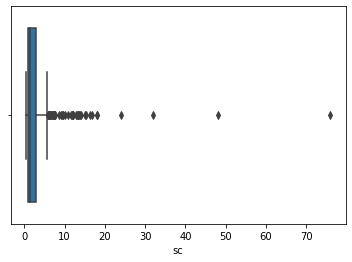

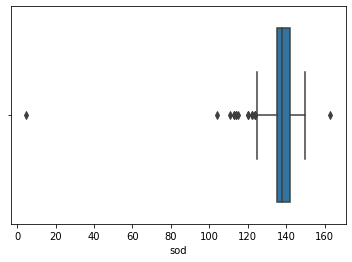

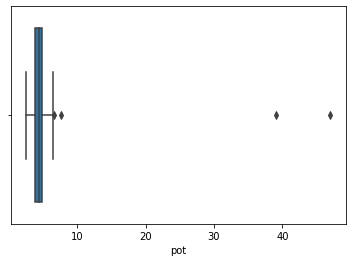

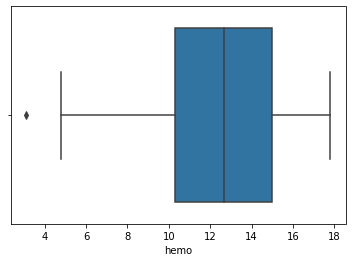

In [17]:
# outliers check
for i in df_imputed.select_dtypes(exclude = ['object']).columns[1:]:
  sns.boxplot(x=df[i])
  plt.show()

This dataset has no outliers (mentioned by the data set providers)

In [18]:
# encode the data
data_encoded = df_imputed.apply(preprocessing.LabelEncoder().fit_transform)

In [19]:
data_encoded.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,40,3,3,1,0,1,1,0,0,...,30,69,33,1,33,0,0,0,0,0
1,1,5,0,3,4,0,1,1,0,0,...,24,53,33,0,33,0,0,0,0,0
2,2,54,3,1,2,3,1,1,0,0,...,17,67,33,0,33,0,1,0,1,0
3,3,40,2,0,4,0,1,0,1,0,...,18,59,18,1,18,0,1,1,1,0
4,4,43,3,1,2,0,1,1,0,0,...,21,65,26,0,26,0,0,0,0,0


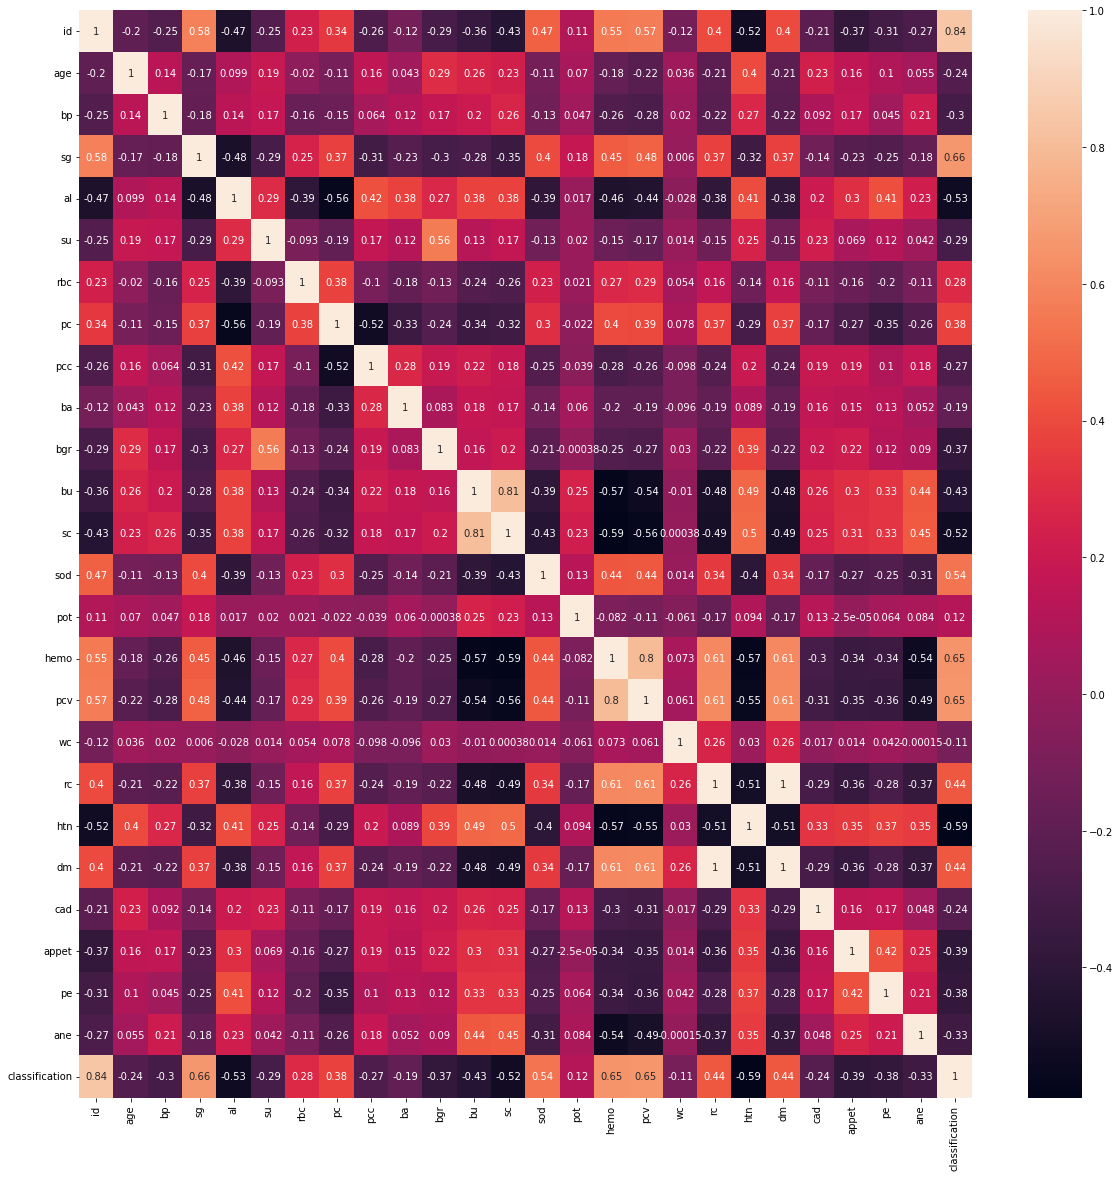

In [20]:
# find correlation
plt.figure(figsize =(20,20))
corr = data_encoded.corr()
sns.heatmap(corr, annot=True)

No data needed to be dropped.

In [21]:
# find data imbalance
data_encoded['classification'].value_counts()

0    250
1    150
Name: classification, dtype: int64

*   0 means 'ckd'
*   1 means 'not ckd'



In [22]:
# separate data and lable
X = data_encoded.drop(['id','classification'], axis = 1)
y = data_encoded['classification']

In [23]:
X.shape

(400, 24)

In [24]:
# fix data imbalance
sampler = RandomOverSampler(random_state=3)
X_res, y_res = sampler.fit_resample(X,y)

In [25]:
y_res.value_counts()

0    250
1    250
Name: classification, dtype: int64

In [26]:
# scaling
scaler = MinMaxScaler(feature_range = (-1,1))
X_scaled = scaler.fit_transform(X_res) 

In [27]:
print(X_scaled[20])

[ 0.41333333 -0.33333333  0.         -0.2        -1.         -1.
 -1.         -1.         -1.          0.14482759  0.58974359 -0.20481928
  0.15151515  0.28205128 -0.73684211 -0.51219512  0.84090909 -0.53191489
  1.         -0.53191489  1.          1.          1.          1.        ]


In [28]:
# PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)
y_pca = y_res

In [29]:
print(X_scaled.shape)
print(X_pca.shape)
print(y_pca.shape)

(500, 24)
(500, 18)
(500,)


In [30]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_pca, test_size = 0.2, random_state = 13, stratify = y_pca)

In [31]:
print(X_pca.shape)
print(X_train.shape)
print(X_test.shape)

(500, 18)
(400, 18)
(100, 18)


## Classification and Evaluation

In [32]:
# importing the libraries
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [33]:
# stacking the layers

model = keras.Sequential()
model.add(keras.layers.Dense(15, input_shape=(X_train.shape[1],), activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(15, activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                285       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_1 (Dense)             (None, 15)                240       
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [35]:
# train the model 
history = model.fit(X_train, y_train, validation_data=[X_test,y_test], epochs=10, verbose=1)

Epoch 1/10
13/13 [==============================] - 1s 14ms/step - loss: 0.7444 - accuracy: 0.4250 - val_loss: 0.7097 - val_accuracy: 0.5400
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 0.6864 - accuracy: 0.5975 - val_loss: 0.6542 - val_accuracy: 0.7800
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6409 - accuracy: 0.6975 - val_loss: 0.6034 - val_accuracy: 0.9000
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 0.5873 - accuracy: 0.8000 - val_loss: 0.5536 - val_accuracy: 0.9200
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.5659 - accuracy: 0.8125 - val_loss: 0.5044 - val_accuracy: 0.9700
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.5080 - accuracy: 0.8525 - val_loss: 0.4560 - val_accuracy: 0.9700
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.4630 - accuracy: 0.9000 - val_loss: 0.4071 - val_accuracy: 0.9700
Epoch 8/10
13/13 [=

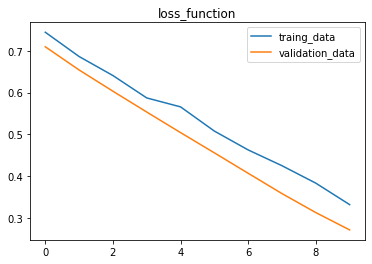

In [36]:
# plot the loss function

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('loss_function')
plt.legend(['traing_data','validation_data'])

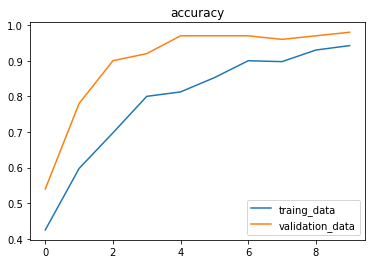

In [37]:
# plot accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('accuracy')
plt.legend(['traing_data','validation_data'])

No issues with over-fitting.

In [38]:
# prediction

y_pred = model.predict(X_test, verbose = True)

4/4 [==============================] - 0s 2ms/step


In [39]:
y_pred

array([[0.7538955 ],
       [0.76920027],
       [0.48125058],
       [0.88281494],
       [0.833249  ],
       [0.13914686],
       [0.13796233],
       [0.79754084],
       [0.09046767],
       [0.8210335 ],
       [0.6628988 ],
       [0.8607514 ],
       [0.25696295],
       [0.10738408],
       [0.8653264 ],
       [0.15979171],
       [0.8180358 ],
       [0.19614387],
       [0.8064833 ],
       [0.74087626],
       [0.6366161 ],
       [0.3448011 ],
       [0.8660176 ],
       [0.24261591],
       [0.24190095],
       [0.83637446],
       [0.5340485 ],
       [0.2767017 ],
       [0.8312158 ],
       [0.17544751],
       [0.7609606 ],
       [0.7695174 ],
       [0.3611591 ],
       [0.06282496],
       [0.790954  ],
       [0.81234145],
       [0.6567347 ],
       [0.7819416 ],
       [0.08354655],
       [0.8182312 ],
       [0.7119236 ],
       [0.8320406 ],
       [0.23698768],
       [0.79947007],
       [0.8210406 ],
       [0.20571528],
       [0.8210406 ],
       [0.740

In [40]:
# precision, recall, f1_score

from sklearn.metrics import precision_recall_curve, f1_score

pres, recall, thres = precision_recall_curve(y_test, y_pred, pos_label = 1)
f1_score = [(2*pres[i]*recall[i])/(pres[i]+recall[i]) for i in range(len(thres))]

ind = np.argmax(f1_score)

In [41]:
print('Precision:' + str(pres[ind]))
print('Recall:' + str(recall[ind]))
print('f1_score:' + str(f1_score[ind]))

Precision:1.0
Recall:1.0
f1_score:1.0


In [42]:
print('Threshold:' + str(thres[ind]))

Threshold:0.6366161


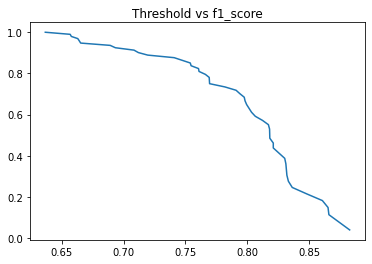

In [43]:
# plot f1_score
plt.plot(thres, f1_score)
plt.title('Threshold vs f1_score')
plt.show()